In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
    roc_curve
)
# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [16]:
X_train = pd.read_csv("x_train_all.csv")
X_test = pd.read_csv("x_test_all.csv")
y_train = pd.read_csv("y_train_all.csv")
y_test = pd.read_csv("y_test_all.csv")

# Balance the dataset

In [17]:
a= y_train.value_counts()
a

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
dtype: int64

In [18]:
from sklearn.utils import resample

y_train.columns = ['Class']

concatenated = pd.concat([X_train, y_train.rename(columns={0: "Output"})], axis="columns")
concatenated.head()

#create two different dataframe of majority and minority class 
df_class_2 = concatenated[(concatenated['Class']==2)] 
df_class_0 = concatenated[(concatenated['Class']==0)] 
df_class_1 = concatenated[(concatenated['Class']==1)] 
df_class_3 = concatenated[(concatenated['Class']==3)] 
df_class_4 = concatenated[(concatenated['Class']==4)] 
df_class_5 = concatenated[(concatenated['Class']==5)] 
df_class_6 = concatenated[(concatenated['Class']==6)] 
df_class_7 = concatenated[(concatenated['Class']==7)] 
df_class_8 = concatenated[(concatenated['Class']==8)] 
df_class_9 = concatenated[(concatenated['Class']==9)] 


df_class_0_upsampled = resample(df_class_0, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_1_upsampled = resample(df_class_1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_3_upsampled = resample(df_class_3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_4_upsampled = resample(df_class_4, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_5_upsampled = resample(df_class_5, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_6_upsampled = resample(df_class_6, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_7_upsampled = resample(df_class_7, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results


df_class_8_upsampled = resample(df_class_8, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_9_upsampled = resample(df_class_9, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

dfs = [df_class_0_upsampled, df_class_1_upsampled, df_class_3_upsampled, df_class_4_upsampled, 
                          df_class_5_upsampled, df_class_6_upsampled, df_class_7_upsampled, df_class_8_upsampled, df_class_9_upsampled,
                          df_class_2]


result = pd.concat(dfs)

result

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
102,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0,0
179,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0,0
92,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0,0
14,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0,0
106,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,25.0,23.0,26.0,26.0,30.0,32.0,29.0,25.0,25.0,23.0,...,23.0,23.0,23.0,23.0,24.0,24.0,22.0,24.0,24.0,2
4676,21.0,21.0,20.0,21.0,21.0,22.0,23.0,22.0,22.0,21.0,...,25.0,25.0,24.0,23.0,23.0,24.0,24.0,25.0,27.0,2
4677,21.0,20.0,20.0,20.0,20.0,22.0,24.0,24.0,24.0,22.0,...,20.0,22.0,22.0,24.0,25.0,24.0,23.0,24.0,25.0,2
4678,24.0,22.0,20.0,20.0,21.0,21.0,20.0,19.0,19.0,22.0,...,25.0,21.0,22.0,24.0,24.0,22.0,23.0,22.0,20.0,2


In [19]:
X_train_upsampled = result.drop(["Class"], axis=1)
X_train_upsampled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
102,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,153.0,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0
179,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,193.0,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0
92,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,155.0,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0
14,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,75.0,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0
106,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,147.0,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,25.0,23.0,26.0,26.0,30.0,32.0,29.0,25.0,25.0,23.0,...,24.0,23.0,23.0,23.0,23.0,24.0,24.0,22.0,24.0,24.0
4676,21.0,21.0,20.0,21.0,21.0,22.0,23.0,22.0,22.0,21.0,...,25.0,25.0,25.0,24.0,23.0,23.0,24.0,24.0,25.0,27.0
4677,21.0,20.0,20.0,20.0,20.0,22.0,24.0,24.0,24.0,22.0,...,21.0,20.0,22.0,22.0,24.0,25.0,24.0,23.0,24.0,25.0
4678,24.0,22.0,20.0,20.0,21.0,21.0,20.0,19.0,19.0,22.0,...,25.0,25.0,21.0,22.0,24.0,24.0,22.0,23.0,22.0,20.0


In [20]:
y_train_upsampled =result["Class"]
y_train_upsampled

102     0
179     0
92      0
14      0
106     0
       ..
4675    2
4676    2
4677    2
4678    2
4679    2
Name: Class, Length: 22500, dtype: int64

In [21]:
features = [0,1,2,3,4,5,6,7,8,9]

# Functions

In [22]:
def overall_model_eval(actual,pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average="weighted")
    precision = precision_score(actual, pred,  average="weighted")
    recall = recall_score(actual, pred,  average="weighted")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    return accuracy, f1, precision, recall
    

In [23]:
def each_cat_eval(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    d = {'Recall': TPR, 'TNR': TNR, 'Precision':PPV, 'NPV': NPV, 'FPR':FPR, 'FNR':FNR,'FDR':FDR, 'ACC':ACC}
    df = pd.DataFrame(data=d)
    print("Against each category\n", df)

    
    return TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC

In [24]:
def cross_validation_kfold(model_arg,train_inp,train_out):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    y_scores = cross_val_score(model_arg, train_inp, train_out, cv=k_fold, n_jobs=1)
    print(y_scores)

In [38]:
from sklearn.metrics import classification_report
label_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred_1, target_names=label_names))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14        60
           1       0.63      0.62      0.62       720
           2       0.62      0.73      0.67       750
           3       0.59      0.57      0.58       450
           4       0.68      0.63      0.65       660
           5       0.79      0.43      0.56        60
           6       0.54      0.47      0.50        90
           7       0.32      0.13      0.19        60
           8       0.56      0.59      0.58       150
           9       0.57      0.46      0.51        90

    accuracy                           0.61      3090
   macro avg       0.54      0.48      0.50      3090
weighted avg       0.61      0.61      0.61      3090



In [41]:
from sklearn.preprocessing import label_binarize

def plot_roc_curves(actual, pred_prob_arg, classes=features):
    y_test_binarized = label_binarize(actual, classes=classes)
    
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob_arg[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
    
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

# Feature selection

In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
def selectFTest(top_features, x_train_arg, y_train_arg, range_arg, x_test_arg, y_test_arg):
    selected_features = []

    for y_class in range(range_arg):
        selector = SelectKBest(score_func=f_classif, k=top_features)
        selector.fit(x_train_arg, (y_train_arg == y_class).astype(int))
        selected_indices = selector.get_support(indices=True)
        selected_features.extend(selected_indices)

    return x_train_arg.iloc[:, selected_features],x_test_arg.iloc[:, selected_features]

feature_selected_50 = selectFTest(5, X_train_upsampled, y_train_upsampled, 10, X_test, y_test) # 50 features
x_train_50 = feature_selected_50[0];
x_test_50 = feature_selected_50[1];

# Decision tree

In [28]:
tree_clf_1 = DecisionTreeClassifier(random_state=42) 
tree_clf_1.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(random_state=42)

# Cross Validation

In [29]:
k_fold_1 = KFold(n_splits=10, shuffle=True, random_state=0)
y_scores_1 = cross_val_score(tree_clf_1, x_train_50, y_train_upsampled, cv=k_fold_1, n_jobs=1)
print(y_scores_1)

[0.95777778 0.94977778 0.95866667 0.95244444 0.956      0.95155556
 0.96       0.95644444 0.95333333 0.95066667]


# Train and Test Set

In [37]:
y_pred_1 = tree_clf_1.predict(x_test_50) # model 1 predictions
pred_prob_1 =  tree_clf_1.predict_proba(x_test_50) #  returns the probabilities associated with each class

## Confusion Matrix

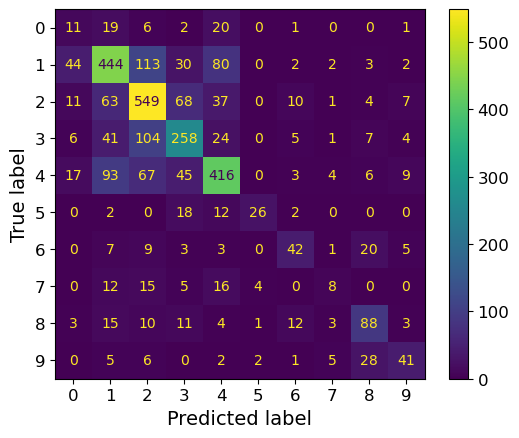

In [31]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1, labels=features)
disp_plot_1 = ConfusionMatrixDisplay(confusion_matrix_1, display_labels=features)
disp_plot_1.plot();

# Overall metrics 

In [32]:
overall_model_eval(y_test,y_pred_1)

Accuracy: 0.6093851132686084
F1 Score: 0.6076820684131843
Precision: 0.6127726842943444
Recall: 0.6093851132686084


(0.6093851132686084,
 0.6076820684131843,
 0.6127726842943444,
 0.6093851132686084)

# Evaluating metrics against each category

In [33]:
TPR_1, TNR_1, PPV_1, NPV_1, FPR_1, FNR_1, FDR_1, ACC_1 = each_cat_eval(confusion_matrix_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.183333  0.973267   0.119565  0.983656  0.026733  0.816667  0.880435   
1  0.616667  0.891561   0.633381  0.884470  0.108439  0.383333  0.366619   
2  0.732000  0.858974   0.624573  0.909091  0.141026  0.268000  0.375427   
3  0.573333  0.931061   0.586364  0.927547  0.068939  0.426667  0.413636   
4  0.630303  0.918519   0.677524  0.901454  0.081481  0.369697  0.322476   
5  0.433333  0.997690   0.787879  0.988878  0.002310  0.566667  0.212121   
6  0.466667  0.988000   0.538462  0.984064  0.012000  0.533333  0.461538   
7  0.133333  0.994389   0.320000  0.983034  0.005611  0.866667  0.680000   
8  0.586667  0.976871   0.564103  0.978868  0.023129  0.413333  0.435897   
9  0.455556  0.989667   0.569444  0.983764  0.010333  0.544444  0.430556   

        ACC  
0  0.957929  
1  0.827508  
2  0.828155  
3  0.878964  
4  0.856958  
5  0.986731  
6  0.972816  
7  0.977670  
8  0.957929  


In [34]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14        60
           1       0.63      0.62      0.62       720
           2       0.62      0.73      0.67       750
           3       0.59      0.57      0.58       450
           4       0.68      0.63      0.65       660
           5       0.79      0.43      0.56        60
           6       0.54      0.47      0.50        90
           7       0.32      0.13      0.19        60
           8       0.56      0.59      0.58       150
           9       0.57      0.46      0.51        90

    accuracy                           0.61      3090
   macro avg       0.54      0.48      0.50      3090
weighted avg       0.61      0.61      0.61      3090



# ROC Curve 

In [42]:
plot_roc_curves(y_test, pred_prob_1)

NameError: name 'auc' is not defined

# Experimentation with various decision tree parameters 

# criterion and splitter

In [48]:
tree_clf_1 = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=42) #model 1
tree_clf_2 = DecisionTreeClassifier(criterion='gini', random_state=42) #model 2
tree_clf_3 = DecisionTreeClassifier(splitter='random', random_state=42) #model 2
tree_clf_1.fit(x_train_50, y_train_upsampled)
tree_clf_2.fit(x_train_50, y_train_upsampled)
tree_clf_3.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(random_state=42, splitter='random')

# Model 1

In [49]:
y_pred_1 = tree_clf_1.predict(x_test_50) # model 1 predictions
pred_prob_1 =  tree_clf_1.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [52]:
overall_model_eval(y_test,y_pred_1)

Accuracy: 0.587378640776699
F1 Score: 0.5874302232517662
Precision: 0.5899929281409849
Recall: 0.587378640776699


(0.587378640776699, 0.5874302232517662, 0.5899929281409849, 0.587378640776699)

# Model 2

In [53]:
y_pred_2 = tree_clf_2.predict(x_test_50) # model 1 predictions
pred_prob_2 =  tree_clf_2.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [55]:
overall_model_eval(y_test,y_pred_2)

Accuracy: 0.6093851132686084
F1 Score: 0.6076820684131843
Precision: 0.6127726842943444
Recall: 0.6093851132686084


(0.6093851132686084,
 0.6076820684131843,
 0.6127726842943444,
 0.6093851132686084)

# Model 3

In [56]:
y_pred_3 = tree_clf_3.predict(x_test_50) # model 1 predictions
pred_prob_3 =  tree_clf_3.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [58]:
overall_model_eval(y_test,y_pred_3)

Accuracy: 0.587378640776699
F1 Score: 0.5874302232517662
Precision: 0.5899929281409849
Recall: 0.587378640776699


(0.587378640776699, 0.5874302232517662, 0.5899929281409849, 0.587378640776699)

# max_leaf_nodes , max_depth

In [59]:
tree_clf_4 = DecisionTreeClassifier(max_leaf_nodes = 5, max_depth = 10, random_state=42) #model 1
tree_clf_5 = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=42) #model 2
tree_clf_6 = DecisionTreeClassifier(max_depth = 10, random_state=42) #model 2
tree_clf_4.fit(x_train_50, y_train_upsampled)
tree_clf_5.fit(x_train_50, y_train_upsampled)
tree_clf_6.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [60]:
y_pred_4 = tree_clf_4.predict(x_test_50) # model 1 predictions
pred_prob_4 =  tree_clf_4.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [61]:
overall_model_eval(y_test,y_pred_4)

Accuracy: 0.16407766990291262
F1 Score: 0.07795811433063761
Precision: 0.053967630767639586
Recall: 0.16407766990291262


C:\Users\kmgov\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.16407766990291262,
 0.07795811433063761,
 0.053967630767639586,
 0.16407766990291262)

In [62]:
y_pred_5 = tree_clf_5.predict(x_test_50) # model 1 predictions
pred_prob_5 =  tree_clf_5.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [63]:
overall_model_eval(y_test,y_pred_5)

Accuracy: 0.16407766990291262
F1 Score: 0.07795811433063761
Precision: 0.053967630767639586
Recall: 0.16407766990291262


C:\Users\kmgov\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.16407766990291262,
 0.07795811433063761,
 0.053967630767639586,
 0.16407766990291262)

In [64]:
y_pred_6 = tree_clf_6.predict(x_test_50) # model 1 predictions
pred_prob_6 =  tree_clf_6.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [65]:
overall_model_eval(y_test,y_pred_6)

Accuracy: 0.5459546925566343
F1 Score: 0.5523458483251356
Precision: 0.5690570409941939
Recall: 0.5459546925566343


(0.5459546925566343,
 0.5523458483251356,
 0.5690570409941939,
 0.5459546925566343)

# max_features

In [68]:
tree_clf_7 = DecisionTreeClassifier(max_features = 10, random_state=42) #model 2
tree_clf_7.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(max_features=10, random_state=42)

In [69]:
y_pred_7 = tree_clf_7.predict(x_test_50) # model 1 predictions
pred_prob_7 =  tree_clf_7.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [70]:
overall_model_eval(y_test,y_pred_7)

Accuracy: 0.568284789644013
F1 Score: 0.5675274776273935
Precision: 0.5736815056551589
Recall: 0.568284789644013


(0.568284789644013, 0.5675274776273935, 0.5736815056551589, 0.568284789644013)

# min_weight_fraction_leaf

In [72]:
tree_clf_8 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.0, random_state=42) #model 2
tree_clf_8.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_8 = tree_clf_8.predict(x_test_50) # model 1 predictions
pred_prob_8 =  tree_clf_8.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [74]:
overall_model_eval(y_test,y_pred_8)

Accuracy: 0.6093851132686084
F1 Score: 0.6076820684131843
Precision: 0.6127726842943444
Recall: 0.6093851132686084


(0.6093851132686084,
 0.6076820684131843,
 0.6127726842943444,
 0.6093851132686084)

# min_samples_leaf

In [75]:
tree_clf_9 = DecisionTreeClassifier(min_samples_leaf = 1, random_state=42) #model 2
tree_clf_9.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_9 = tree_clf_9.predict(x_test_50) # model 1 predictions
pred_prob_9 =  tree_clf_9.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [77]:
overall_model_eval(y_test,y_pred_9)

Accuracy: 0.6093851132686084
F1 Score: 0.6076820684131843
Precision: 0.6127726842943444
Recall: 0.6093851132686084


(0.6093851132686084,
 0.6076820684131843,
 0.6127726842943444,
 0.6093851132686084)